In [18]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_parquet('Orbit Response (2025-08-12 at 00-06-10).parquet', engine = 'pyarrow')
df

Measurement 1
BPM             Corrector          Step (mrad)               
BS-DI-EBPM-02:X BS-PC-HSTR-01:SETI -0.5             -0.002151
                                   0.0               0.000006
                                   0.5               0.002162
                BS-PC-HSTR-02:SETI -0.5             -0.001029
                                   0.0               0.000006
...                                                       ...
BS-DI-EBPM-07:Y BS-PC-VSTR-06:SETI 0.0               0.000022
                                   0.5               0.006023
                BS-PC-VSTR-07:SETI -0.5             -0.002557
                                   0.0               0.000022
                                   0.5               0.002602

[504 rows x 1 columns]

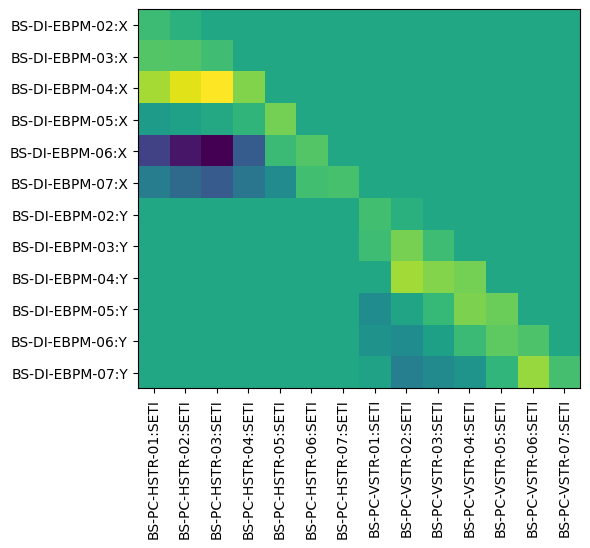

In [ ]:
import matplotlib.pyplot as plt

data = df.to_numpy()
shape = [len(level) for level in df.index.levels]
labels = [df.index.get_level_values(_).unique().tolist() for _ in range(len(shape) - 1)] # preserves labelling order of df
data = data.reshape(*shape, df.shape[1])

numCorrectors = 14
numBPMs = 12
kicks = np.linspace(-.5, .5, 3)

postProcessedData = np.zeros((numBPMs, numCorrectors))

dataAveragedOverRepeats = data.mean(axis = 3)
for col in range(numCorrectors):
    for row in range(numBPMs):
        y = dataAveragedOverRepeats[row, col, :]
        m, C = np.polyfit(kicks, y, deg = 1, cov = True)
        postProcessedData[row, col] = m[0]

fig, ax = plt.subplots(figsize = (6, 6))
im = ax.imshow(postProcessedData)
ax.set_yticks(list(range(numBPMs)))
ax.set_yticklabels(labels[0])
ax.set_xticks(list(range(numCorrectors)))
ax.set_xticklabels(labels[1], rotation = 90)
fig.tight_layout()